In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = pd.read_csv('/content/Symptom-severity.csv')
df1.head(5)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
cols = df.columns
data = df[cols].values.flatten()
print(f"Shape: {data.shape}")
data

Shape: (88560,)


array(['Fungal infection', 'itching', ' skin_rash', ..., nan, nan, nan],
      dtype=object)

In [ ]:
series_data = pd.Series(data)
series_data = series_data.str.strip()
series_data = series_data.values.reshape(df.shape)
df = pd.DataFrame(series_data, columns=df.columns)
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
(df[cols] == 0).all()
df['Disease'].value_counts()
df['Disease'].unique()
data = df.iloc[:,1:].values
labels = df['Disease'].values
print(labels)

['Fungal infection' 'Fungal infection' 'Fungal infection' ...
 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print(f"Shape of balanced dataset: {X_resampled.shape}")

lr_model = LogisticRegression(solver='saga', max_iter=2500)
lr_model.fit(X_resampled, y_resampled)


Shape of balanced dataset: (4346, 17)


LogisticRegression(max_iter=2500, solver='saga')

Class distribution:
Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                     

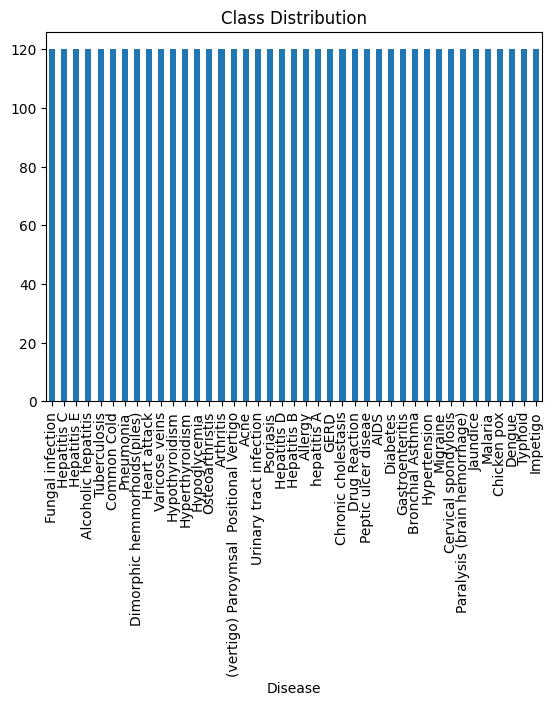

In [ ]:
class_distribution = df['Disease'].value_counts()

print("Class distribution:")
print(class_distribution)

df['Disease'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

In [ ]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(5, 5), dpi=150)

    y_pred = model.predict(X_test)

    conf_mat = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

    sns.heatmap(df_cm, annot=True)

In [ ]:
l = []
def create_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)

    acc = accuracy_score(y_test, y_pred)
    ac=acc*100

    print(f"Accuracy : {ac:.4} %\n")
    print("Classification report: \n")
    print(report)

1.Logistic Regression

In [ ]:
lr_model = LogisticRegression(solver='saga', max_iter=2500)
lr_model.fit(X_train, y_train)
create_report(lr_model, X_test, y_test)

Accuracy : 90.55 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.96      0.89      0.92        27
                                   AIDS       0.71      1.00      0.83        17
                                   Acne       1.00      1.00      1.00        27
                    Alcoholic hepatitis       1.00      0.82      0.90        28
                                Allergy       0.54      0.90      0.68        21
                              Arthritis       0.73      0.92      0.81        24
                       Bronchial Asthma       0.69      0.46      0.55        24
                   Cervical spondylosis       0.71      0.56      0.63        27
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       0.85      0.96      0.90        23
                            Common Cold       1.00      1.00   

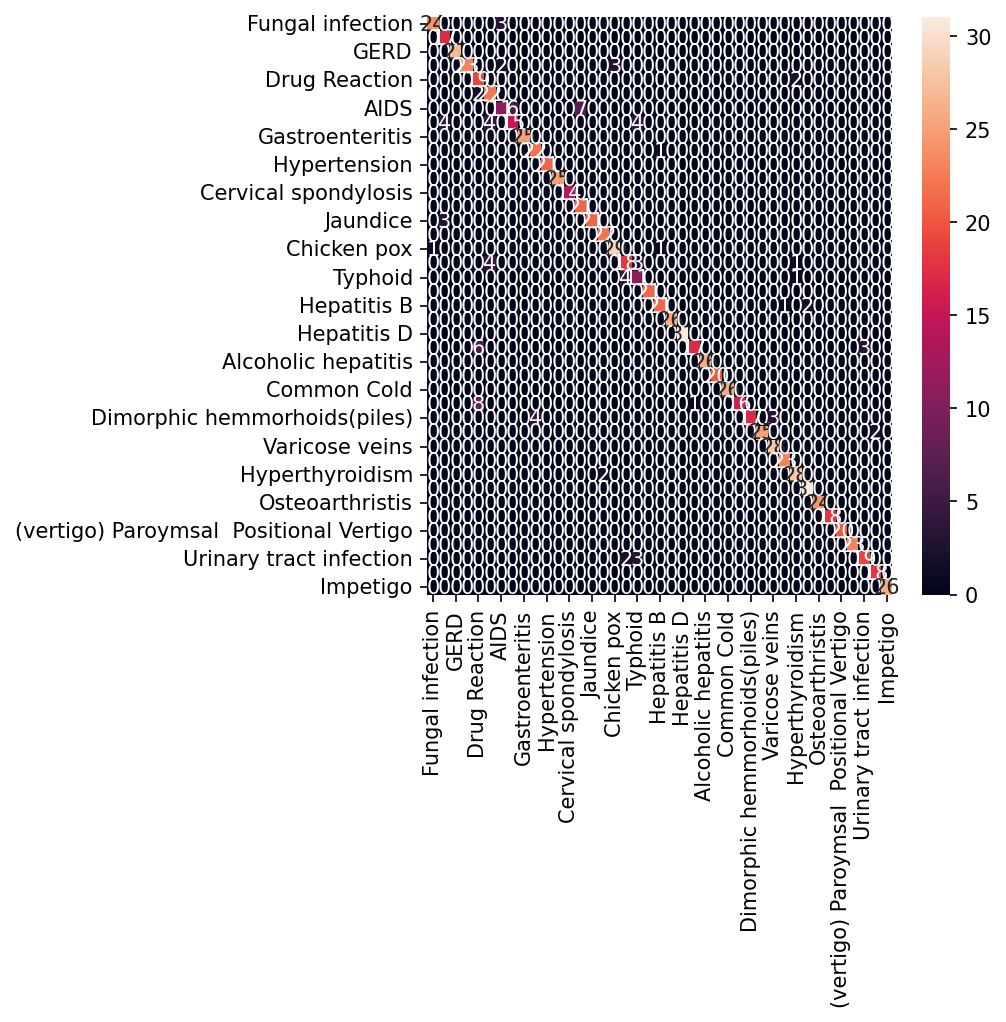

In [ ]:
confusion_plot(lr_model, X_test, y_test)

2.Support Vector Classifier

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
create_report(svc_model, X_test, y_test)

Accuracy : 92.07 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.86      0.70      0.78        27
                                   AIDS       0.77      1.00      0.87        17
                                   Acne       1.00      1.00      1.00        27
                    Alcoholic hepatitis       0.88      0.79      0.83        28
                                Allergy       0.73      0.90      0.81        21
                              Arthritis       0.79      0.92      0.85        24
                       Bronchial Asthma       0.69      0.46      0.55        24
                   Cervical spondylosis       0.79      0.85      0.82        27
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       0.85      0.96      0.90        23
                            Common Cold       1.00      1.00   

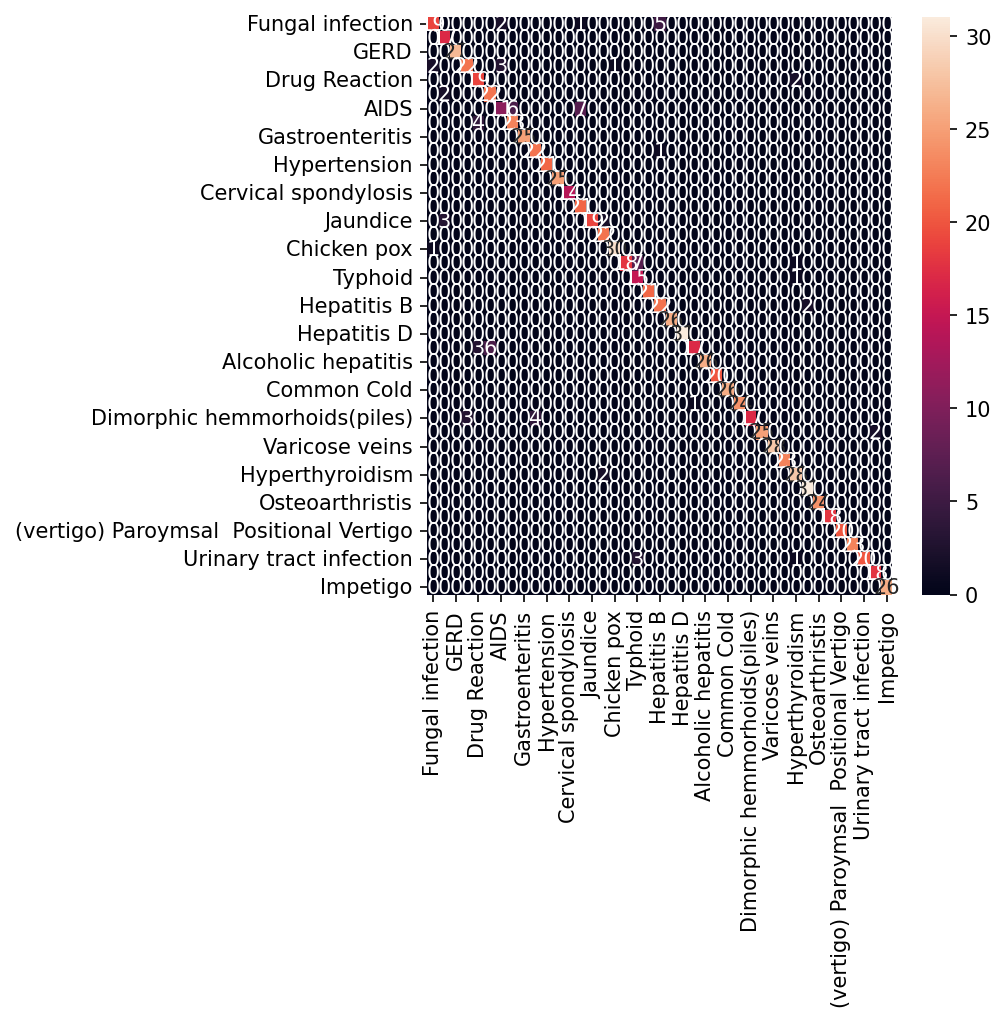

In [ ]:
confusion_plot(svc_model, X_test, y_test)

3.Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
create_report(dt_model, X_test, y_test)

Accuracy : 99.39 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        27
                                   AIDS       1.00      1.00      1.00        17
                                   Acne       1.00      1.00      1.00        27
                    Alcoholic hepatitis       1.00      1.00      1.00        28
                                Allergy       0.88      1.00      0.93        21
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       0.93      1.00      0.96        27
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       1.00      1.00      1.00        23
                            Common Cold       1.00      1.00   

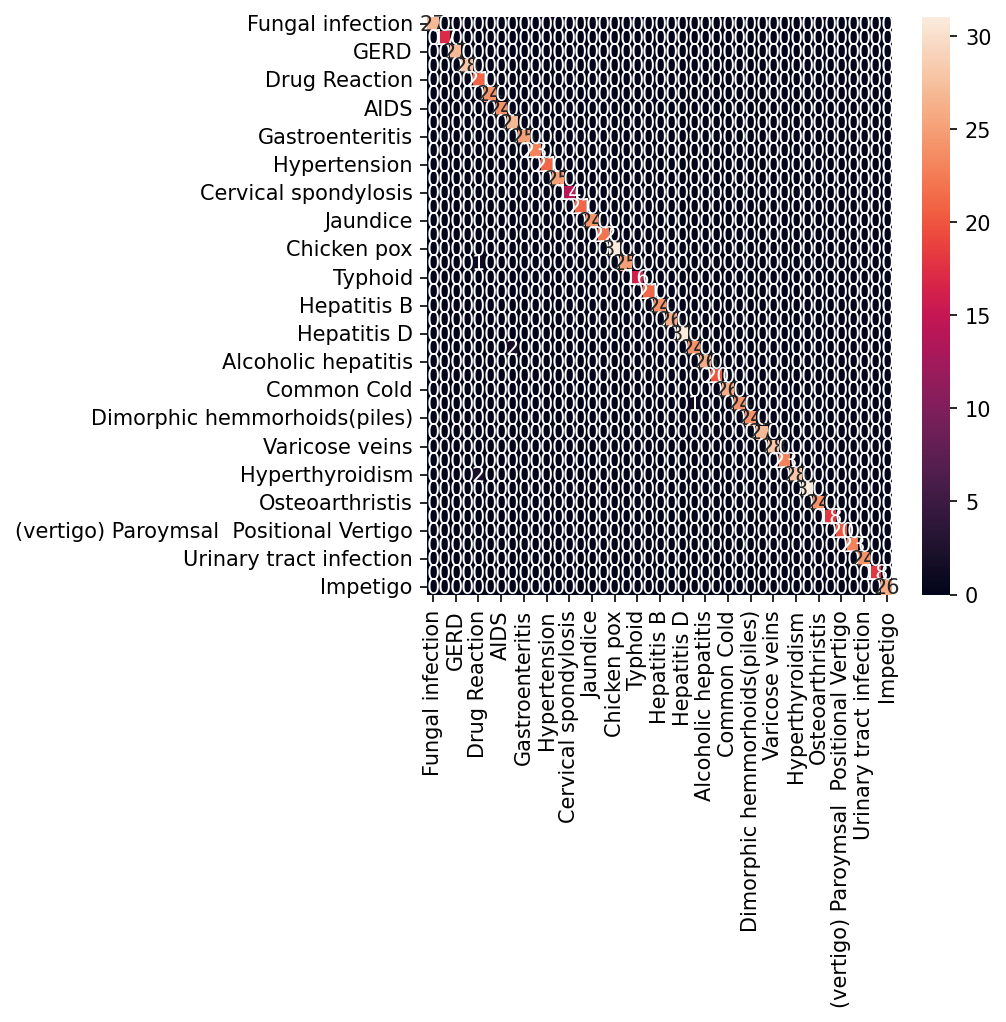

In [ ]:
confusion_plot(dt_model, X_test, y_test)

4.Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
create_report(rf_model, X_test, y_test)

Accuracy : 99.39 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        27
                                   AIDS       1.00      1.00      1.00        17
                                   Acne       1.00      1.00      1.00        27
                    Alcoholic hepatitis       1.00      1.00      1.00        28
                                Allergy       0.88      1.00      0.93        21
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       0.93      1.00      0.96        27
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       1.00      1.00      1.00        23
                            Common Cold       1.00      1.00   

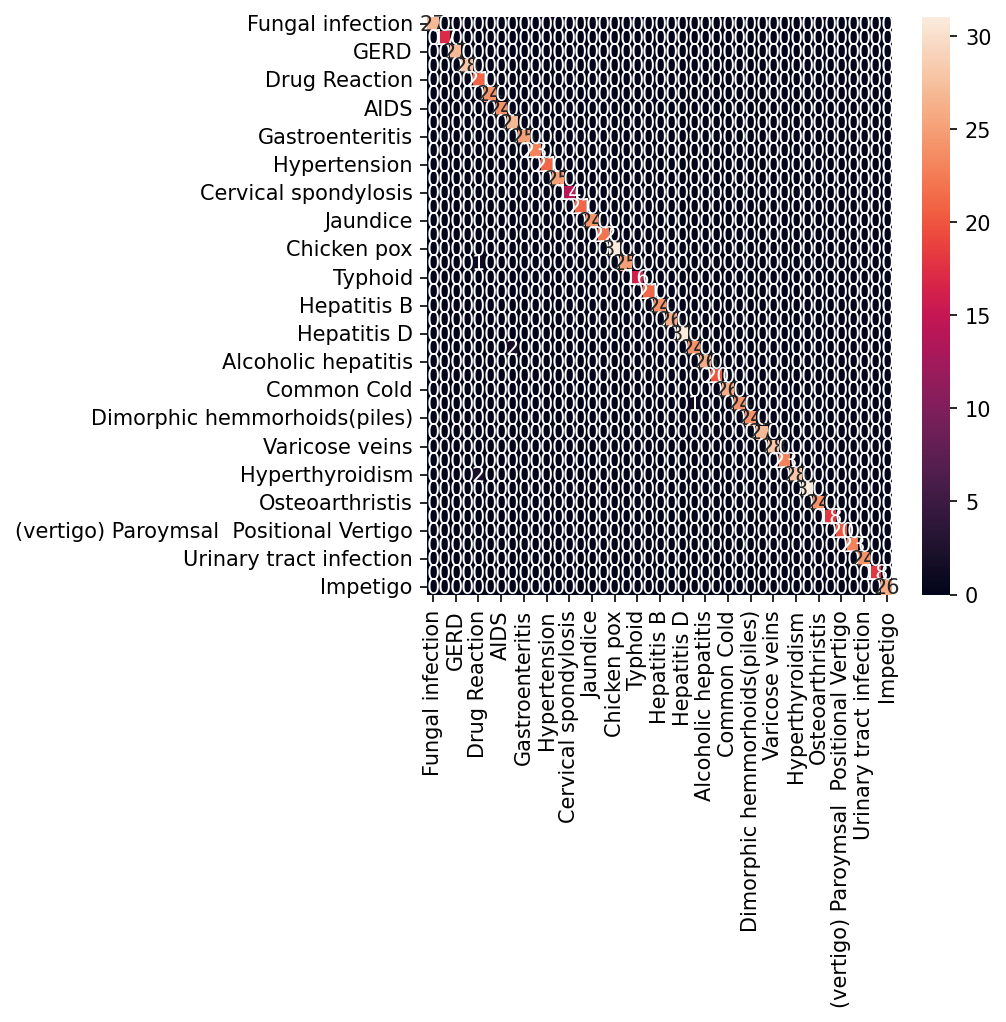

In [ ]:
confusion_plot(rf_model, X_test, y_test)

5.K-Nearest Neighbors


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
create_report(knn_model, X_test, y_test)

Accuracy : 99.59 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        27
                                   AIDS       1.00      1.00      1.00        17
                                   Acne       1.00      1.00      1.00        27
                    Alcoholic hepatitis       1.00      1.00      1.00        28
                                Allergy       1.00      0.95      0.98        21
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        27
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       1.00      1.00      1.00        23
                            Common Cold       1.00      1.00   

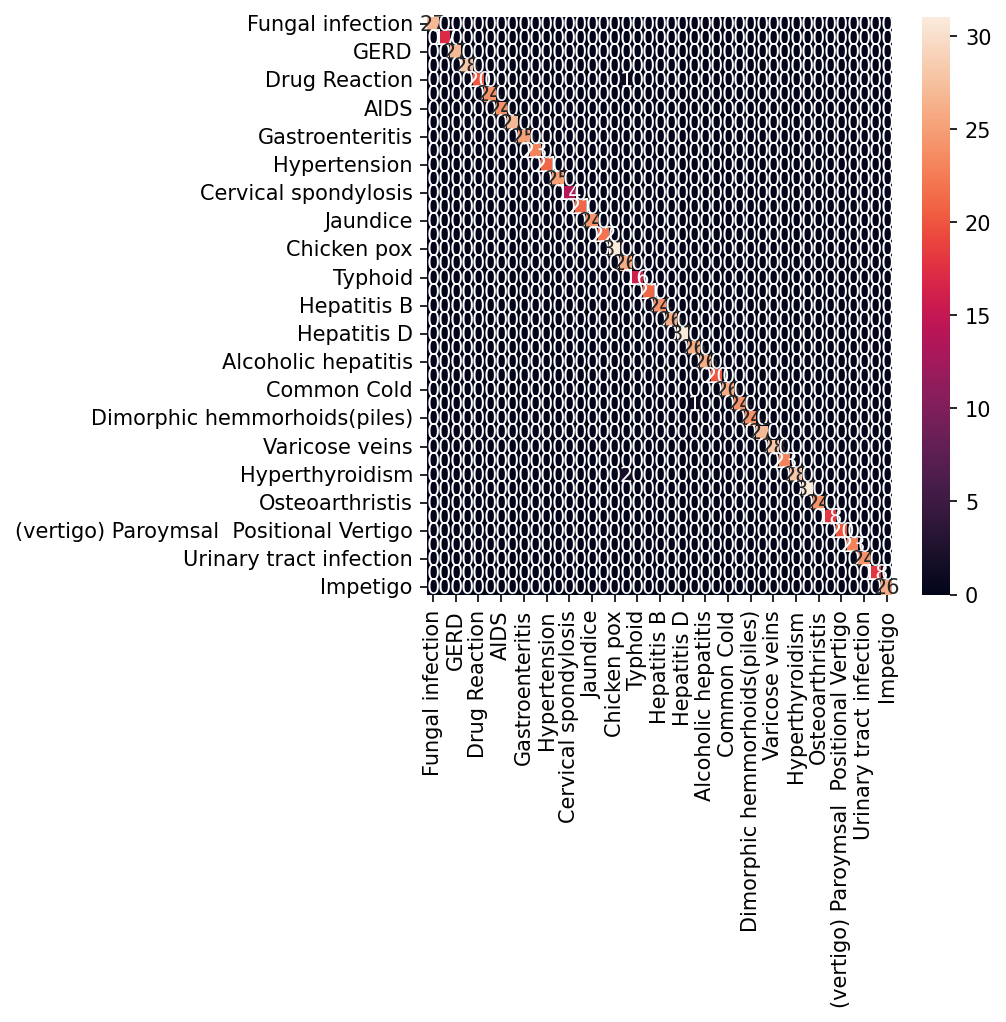

In [ ]:
confusion_plot(knn_model, X_test, y_test)

In [ ]:
accuracy_scores=[]
def print_accuracy(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ac = acc * 100
    accuracy_scores.append(ac)
    print(f"{model_name} Accuracy: {ac:.4} %")

print("Accuracy of Every Modals")
print_accuracy(lr_model, X_test, y_test, 'Logistic Regression')
print_accuracy(svc_model, X_test, y_test, 'Support Vector Classifier')
print_accuracy(dt_model, X_test, y_test, 'Decision Tree Classifier')
print_accuracy(rf_model, X_test, y_test, 'Random Forest Classifier')
print_accuracy(knn_model, X_test, y_test, 'K-Nearest Neighbors')

Accuracy of Every Modals
Logistic Regression Accuracy: 90.55 %
Support Vector Classifier Accuracy: 92.07 %
Decision Tree Classifier Accuracy: 99.39 %
Random Forest Classifier Accuracy: 99.39 %
K-Nearest Neighbors Accuracy: 99.59 %


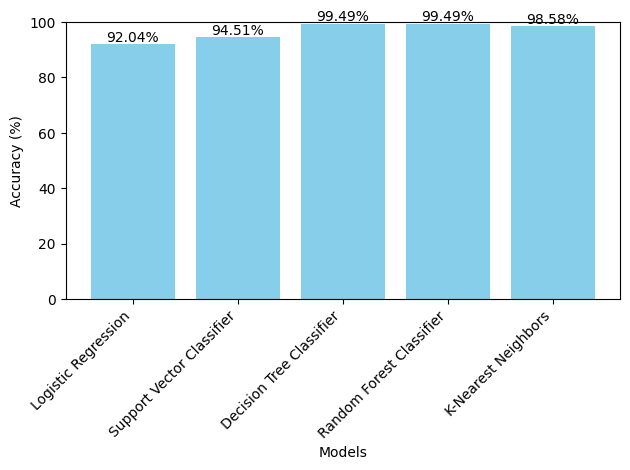

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Support Vector Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbors']
accuracies = [92.04,94.51,99.49,99.49,98.58]
plt.bar(models, accuracies, color='skyblue')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

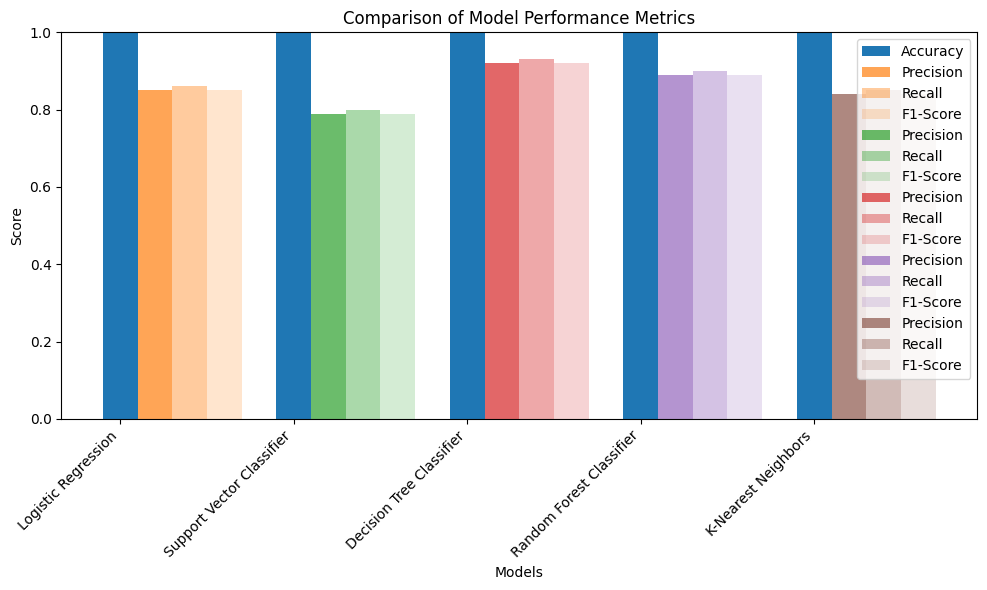

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
models = ['Logistic Regression', 'Support Vector Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbors']
accuracies = [85.2, 79.6, 92.3, 89.7, 84.1]
precisions = [0.85, 0.79, 0.92, 0.89, 0.84]
recalls = [0.86, 0.80, 0.93, 0.90, 0.85]
f1_scores = [0.85, 0.79, 0.92, 0.89, 0.84]
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors
bar_width = 0.2
plt.bar(models, accuracies, width=bar_width, color=colors[0], label='Accuracy')
for i, model in enumerate(models):
    plt.bar(i + bar_width, precisions[i], width=bar_width, color=colors[i+1], alpha=0.7, label='Precision')
    plt.bar(i + 2*bar_width, recalls[i], width=bar_width, color=colors[i+1], alpha=0.4, label='Recall')
    plt.bar(i + 3*bar_width, f1_scores[i], width=bar_width, color=colors[i+1], alpha=0.2, label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()